In [4]:
import linopy
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from shapely import wkt
import numpy as np

In [5]:
mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

maxcapacityfor_spp = 90
maxcapacityfor_vspp = 10

radius_spp_wind = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_wind * 3.14)) / 100,5)
radius_vspp_wind = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_wind * 3.14)) / 100,5)

radius_spp_solar = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_solar * 3.14)) / 100,5)
radius_vspp_solar = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_solar * 3.14)) / 100,5)

suitablearea_biomass = 2500 ## km2 
suitablearea_bgec = 2500 ## km2
suitablearea_msw = 2500 ## km2

print('radius_spp_wind km = ',radius_spp_wind*100,' buffer = ',radius_spp_wind)
print('radius_vspp_wind km = ',radius_vspp_wind*100,' buffer = ',radius_vspp_wind)
print('radius_spp_solar km = ',radius_spp_solar*100,' buffer = ',radius_spp_solar)
print('radius_vspp_solar km = ',radius_vspp_solar*100,' buffer = ',radius_vspp_solar)

radius_spp_wind km =  2.524  buffer =  0.02524
radius_vspp_wind km =  0.8410000000000001  buffer =  0.00841
radius_spp_solar km =  1.3820000000000001  buffer =  0.01382
radius_vspp_solar km =  0.461  buffer =  0.00461


In [6]:
scenario_SI = 0
coarsenscale = 20
xr_out = xr.open_dataset('Output\\xr_output_all_SSI_' + str(scenario_SI) + "_CS_"+ str(coarsenscale)+ '_.nc')
print(xr_out)
print("cap_wind = ",xr_out['cap_wind'].sum())
print("cap_solar = ",xr_out['cap_solar'].sum())
print("cap_biomass = ",xr_out['cap_biomass'].sum())
print("cap_bgec = ",xr_out['cap_bgec'].sum())
print("cap_msw = ",xr_out['cap_msw'].sum())

<xarray.Dataset> Size: 10MB
Dimensions:      (lat: 267, lon: 149)
Coordinates:
  * lat          (lat) float64 2kB 5.642 5.697 5.753 5.808 ... 20.31 20.36 20.42
  * lon          (lon) float64 1kB 97.37 97.43 97.48 97.54 ... 105.5 105.5 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) int64 318kB ...
    SI_BGEC      (lat, lon) float64 318kB ...
    SI_Biomass   (lat, lon) float64 318kB ...
    SI_Solar     (lat, lon) float64 318kB ...
    SI_Wind      (lat, lon) float64 318kB ...
    SI_MSW       (lat, lon) float64 318kB ...
    ...           ...
    region       (lat, lon) <U2 318kB ...
    cap_wind     (lat, lon) float64 318kB ...
    cap_solar    (lat, lon) float64 318kB ...
    cap_biomass  (lat, lon) float64 318kB ...
    cap_bgec     (lat, lon) float64 318kB ...
    cap_msw      (lat, lon) float64 318kB ...
cap_wind =  <xarray.DataArray 'cap_wind' ()> Size: 8B
array(11145.6)
cap_solar =  <xarray.DataArray 'cap_solar' ()> Size: 8B
array(536097.1606)
cap_biomass =  <xarray.

In [7]:
try:
    df_wind = xr_out.to_dataframe()
    xr_out.close()
    df_wind.reset_index(inplace=True)
    df_wind = gpd.GeoDataFrame(df_wind, geometry =gpd.points_from_xy(df_wind['lon'],df_wind['lat']))
    df_wind.crs = {'init': 'epsg:4326'}
    print(len(df_wind))
    for i,c in enumerate(df_wind.columns):
        if c not in (['lon','lat','SI_Wind','SI_Wind_max','SI_Wind_min','region','ADM1_EN','cap_wind','AVA_Wind','geometry']):
            df_wind = df_wind.drop(columns=c)

    df_wind = df_wind.loc[df_wind['cap_wind'] > 0]
    df_wind.reset_index(inplace=True,drop=False)
    df_wind.crs = {'init': 'epsg:4326'}
    df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)
    df_wind = df_wind.set_geometry('buffer')

    df_wind.to_csv('Output\\Output_wind_all_SSI_' + str(scenario_SI) + "_CS_" + str(coarsenscale)+ '.csv',index=False,encoding="utf-8-sig")

    print(df_wind)
    
except:
    None

39783
     index        lat         lon   SI_Wind   AVA_Wind     ADM1_EN region  \
0     2296   6.475000  100.761111  0.076917   2.160000    Songkhla     R3   
1     2747   6.641667  100.983333  0.323760   8.100000     Pattani     R3   
2     2748   6.641667  101.038889  0.147355   3.780000     Pattani     R3   
3     2751   6.641667  101.205556  0.256495   6.300000     Pattani     R3   
4     2754   6.641667  101.372222  0.496283  11.970002     Pattani     R3   
..     ...        ...         ...       ...        ...         ...    ...   
445  37874  19.752778   98.927778  0.015051   0.630000  Chiang Rai     R4   
446  38201  19.863889  100.538889  0.167222   6.300001  Chiang Rai     R4   
447  38202  19.863889  100.594444  0.030776   1.170000  Chiang Rai     R4   
448  38350  19.919444  100.538889  0.126536   4.770000  Chiang Rai     R4   
449  38351  19.919444  100.594444  0.013771   0.540000  Chiang Rai     R4   

     cap_wind                    geometry  \
0       9.720     POINT 

d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\595078\AppData\Local\Temp\ipykernel_23540\1157218713.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-pr

In [8]:
try:
    df_solar = xr_out.to_dataframe()
    df_solar.reset_index(inplace=True)
    df_solar = gpd.GeoDataFrame(df_solar, geometry =gpd.points_from_xy(df_solar['lon'],df_solar['lat']))
    df_solar.crs = {'init': 'epsg:4326'}
    print(len(df_solar))
    for i,c in enumerate(df_solar.columns):
        if c not in (['lon','lat','SI_Solar','SI_Solar_max','SI_Solar_min','region','ADM1_EN','cap_solar','AVA_Solar','geometry']):
            df_solar = df_solar.drop(columns=c)

    df_solar = df_solar.loc[df_solar['cap_solar'] > 0]
    df_solar.reset_index(inplace=True,drop=False)
    df_solar.crs = {'init': 'epsg:4326'}
    df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)
    df_solar = df_solar.set_geometry('buffer')

    df_solar.to_csv('Output\\Output_solar_all_SSI_' + str(scenario_SI) + "_CS_" + str(coarsenscale)+ '.csv',index=False,encoding="utf-8-sig")

    print(df_solar)

except:
    None

39783


d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


      index        lat         lon  SI_Solar  AVA_Solar     ADM1_EN region  \
0       827   5.919444  101.927778  0.005266   0.090000  Narathiwat     R3   
1      2159   6.419444  101.427778  0.163344   2.430000        Yala     R3   
2      2160   6.419444  101.483333  1.154573  17.190002  Narathiwat     R3   
3      2161   6.419444  101.538889  0.035182   0.630000  Narathiwat     R3   
4      2164   6.419444  101.705556  0.242654   3.420000  Narathiwat     R3   
...     ...        ...         ...       ...        ...         ...    ...   
3578  39534  20.363889  100.094444  0.108660   1.980000  Chiang Rai     R4   
3579  39535  20.363889  100.150000  0.398544   7.470000  Chiang Rai     R4   
3580  39536  20.363889  100.205556  0.413210   7.560000  Chiang Rai     R4   
3581  39682  20.419444  100.038889  0.004406   0.090000  Chiang Rai     R4   
3582  39683  20.419444  100.094444  0.349426   6.120000  Chiang Rai     R4   

      cap_solar                    geometry  \
0          1.35 

C:\Users\595078\AppData\Local\Temp\ipykernel_23540\3812903428.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)


In [9]:
try:
    df_biomass = xr_out.to_dataframe()
    df_biomass.reset_index(inplace=True)
    df_biomass = gpd.GeoDataFrame(df_biomass, geometry =gpd.points_from_xy(df_biomass['lon'],df_biomass['lat']))
    df_biomass.crs = {'init': 'epsg:4326'}
    print(len(df_biomass))
    for i,c in enumerate(df_biomass.columns):
        if c not in (['lon','lat','SI_Biomass','SI_Biomass_max','SI_Biomass_min','region','ADM1_EN','cap_biomass','geometry']):
            df_biomass = df_biomass.drop(columns=c)

    df_biomass = df_biomass.loc[df_biomass['cap_biomass'] > 0]
    df_biomass.reset_index(inplace=True,drop=False)
    df_biomass.crs = {'init': 'epsg:4326'}
    df_biomass['buffer'] = df_biomass['geometry'].buffer(np.round(np.sqrt(suitablearea_biomass/(3.14)) / 150,5),cap_style = 3)
    df_biomass = df_biomass.set_geometry('buffer')

    df_biomass.to_csv('Output\\Output_biomass_all_SSI_' + str(scenario_SI) + "_CS_"+str(coarsenscale)+ '.csv',index=False,encoding="utf-8-sig")

    print(df_biomass)
    
except:
    None

d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


39783
    index        lat         lon  SI_Biomass       ADM1_EN region  \
0     664   5.863889  101.150000    0.428944          Yala     R3   
1    1418   6.141667  101.650000    0.153406    Narathiwat     R3   
2    2005   6.363889  101.150000    1.049508          Yala     R3   
3    3039   6.752778  100.650000    0.505540      Songkhla     R3   
4    3176   6.808333   99.983333    0.449496         Satun     R3   
..    ...        ...         ...         ...           ...    ...   
80  36715  19.308333  100.761111    0.712649           Nan     R4   
81  37022  19.419444  101.261111    0.185145           Nan     R4   
82  37565  19.641667   98.316667    0.040868  Mae Hong Son     R4   
83  38330  19.919444   99.427778    0.397991    Chiang Rai     R4   
84  38641  20.030556  100.150000    1.151963    Chiang Rai     R4   

    cap_biomass                    geometry  \
0        4.4112      POINT (101.15 5.86389)   
1       42.6737      POINT (101.65 6.14167)   
2       32.2241      POI

d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\595078\AppData\Local\Temp\ipykernel_23540\2187561379.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_biomass['buffer'] = df_biomass['geometry'].buffer(np.round(np.sqrt(suitablearea_biomass/(3.14)) / 150,5),cap_style = 3)


In [10]:
try:
    df_bgec = xr_out.to_dataframe()
    df_bgec.reset_index(inplace=True)
    df_bgec = gpd.GeoDataFrame(df_bgec, geometry =gpd.points_from_xy(df_bgec['lon'],df_bgec['lat']))
    df_bgec.crs = {'init': 'epsg:4326'}
    print(len(df_bgec))
    for i,c in enumerate(df_bgec.columns):
        if c not in (['lon','lat','SI_BGEC','SI_BGEC_max','SI_BGEC_min','region','ADM1_EN','cap_bgec','geometry']):
            df_bgec = df_bgec.drop(columns=c)

    df_bgec = df_bgec.loc[df_bgec['cap_bgec'] > 0]
    df_bgec.reset_index(inplace=True,drop=False)
    df_bgec.crs = {'init': 'epsg:4326'}
    df_bgec['buffer'] = df_bgec['geometry'].buffer(np.round(np.sqrt(suitablearea_bgec/(3.14)) / 150,5),cap_style = 3)
    df_bgec = df_bgec.set_geometry('buffer')

    df_bgec.to_csv('Output\\Output_bgec_all_SSI_' + str(scenario_SI) + "_CS_"+str(coarsenscale)+ '.csv',index=False,encoding="utf-8-sig")

    print(df_bgec)

except:
    None

39783
   index        lat         lon   SI_BGEC            ADM1_EN region  cap_bgec  \
0  18566  12.530556  102.372222  0.243400               Trat     R1    7.3519   
1  19290  12.808333  101.205556  0.276664             Rayong     R1   14.4270   
2  19600  12.919444  101.872222  0.557003        Chanthaburi     R1   19.7880   
3  20056  13.086111  102.372222  1.042778        Chanthaburi     R1   11.9711   
4  20634  13.308333  101.372222  0.574822          Chon Buri     R1   29.2611   
5  24207  14.641667  101.205556  0.184342           Saraburi     R1   13.1604   
6  24226  14.641667  102.261111  0.466553  Nakhon Ratchasima     R2   46.3619   
7  24366  14.697222  101.761111  0.927031  Nakhon Ratchasima     R2   56.2886   
8  25707  15.197222  101.761111  0.140792  Nakhon Ratchasima     R2   56.9931   
9  26014  15.308333  102.261111  0.561891  Nakhon Ratchasima     R2   39.3408   

                     geometry  \
0  POINT (102.37222 12.53056)   
1  POINT (101.20556 12.80833)   
2  

d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\595078\AppData\Local\Temp\ipykernel_23540\74652749.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-proj

In [11]:
try: 
    df_msw = xr_out.to_dataframe()
    df_msw.reset_index(inplace=True)
    df_msw = gpd.GeoDataFrame(df_msw, geometry =gpd.points_from_xy(df_msw['lon'],df_msw['lat']))
    df_msw.crs = {'init': 'epsg:4326'}
    print(len(df_msw))
    for i,c in enumerate(df_msw.columns):
        if c not in (['lon','lat','SI_MSW','SI_MSW_max','SI_MSW_min','region','ADM1_EN','cap_msw','geometry']):
            df_msw = df_msw.drop(columns=c)

    df_msw = df_msw.loc[df_msw['cap_msw'] > 0]
    df_msw.reset_index(inplace=True,drop=False)
    df_msw.crs = {'init': 'epsg:4326'}
    df_msw['buffer'] = df_msw['geometry'].buffer(np.round(np.sqrt(suitablearea_msw/(3.14)) / 150,5),cap_style = 3)
    df_msw = df_msw.set_geometry('buffer')

    df_msw.to_csv('Output\\Output_msw_all_SSI_' + str(scenario_SI) + "_CS_" +str(coarsenscale) + '.csv',index=False,encoding="utf-8-sig")

    print(df_msw)

except:
    None

d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


39783


d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


    index        lat         lon    SI_MSW           ADM1_EN region   cap_msw  \
0    1576   6.197222  102.150000  0.005037        Narathiwat     R3   48.9768   
1    6275   7.975000   98.316667  0.050977            Phuket     R3   47.4653   
2    9554   9.197222   98.372222  0.293787          Phangnga     R3    8.8612   
3   21806  13.752778  100.261111  0.025550      Samut Sakhon     R1  470.0055   
4   21817  13.752778  100.872222  0.939457      Samut Prakan     R0  679.7262   
5   25288  15.030556  103.316667  0.520643             Surin     R2   55.8857   
6   26207  15.363889  104.705556  0.851054  Ubon Ratchathani     R2   72.7892   
7   29448  16.586111  102.650000  0.204503         Khon Kaen     R2   37.8271   
8   30515  16.975000  103.983333  0.618239      Sakon Nakhon     R2   43.9353   
9   33175  17.975000  102.761111  0.106300         Nong Khai     R2   39.6125   
10  34893  18.641667   98.872222  0.473064        Chiang Mai     R4  119.7905   

                      geome

C:\Users\595078\AppData\Local\Temp\ipykernel_23540\3455957907.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_msw['buffer'] = df_msw['geometry'].buffer(np.round(np.sqrt(suitablearea_msw/(3.14)) / 150,5),cap_style = 3)


total wind capacity =  11145.6
R0 wind =  0.0
R1 wind =  2442.96
R2 wind =  6145.469999999999
R3 wind =  1785.6450000000002
R4 wind =  771.525


d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


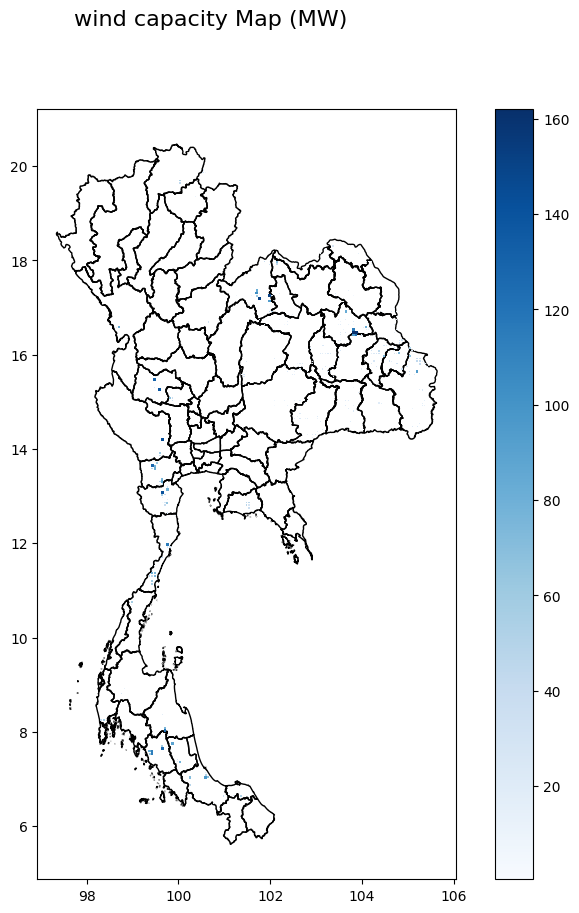

In [12]:
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

print("total wind capacity = ", df_wind['cap_wind'].sum())
print("R0 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R0'].sum())
print("R1 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R1'].sum())
print("R2 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R2'].sum())
print("R3 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R3'].sum())
print("R4 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('wind capacity Map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_wind.plot(ax = ax,legend=True,zorder = 1,column = 'cap_wind',cmap = 'Blues')
except:
    None

total solar capacity =  536097.1606000001
R0 Solar =  2606.8501000000006
R1 Solar =  100354.9523
R2 Solar =  253924.20339999997
R3 Solar =  46511.55130000001
R4 Solar =  132699.60350000003


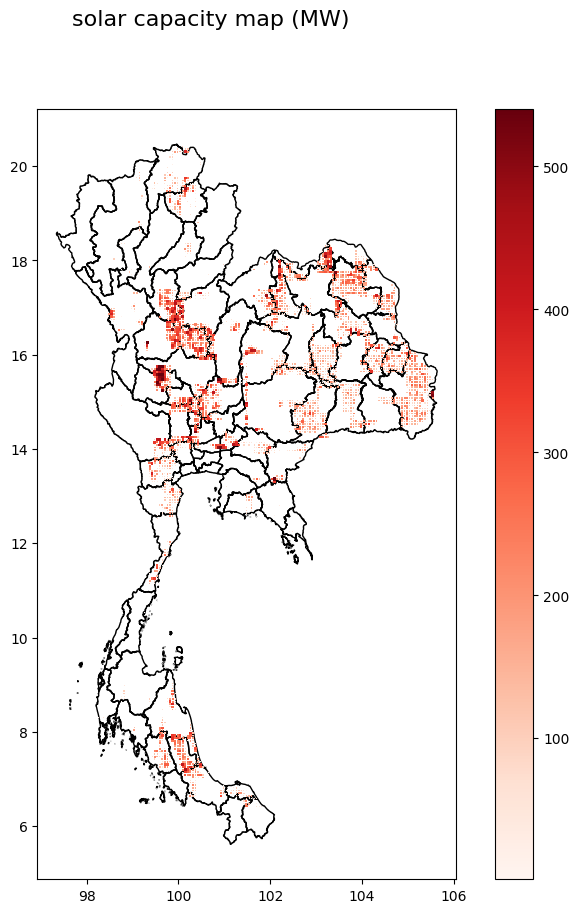

In [13]:
print("total solar capacity = ", df_solar['cap_solar'].sum())
print("R0 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R0'].sum())
print("R1 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R1'].sum())
print("R2 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R2'].sum())
print("R3 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R3'].sum())
print("R4 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('solar capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_solar.plot(ax = ax,legend=True,zorder = 1,column = 'cap_solar',cmap = 'Reds')
except:
    None


total biomass capacity =  8332.1793
R0 biomass =  0.0
R1 biomass =  1364.1375999999998
R2 biomass =  2246.2963
R3 biomass =  2104.2751
R4 biomass =  2617.4703


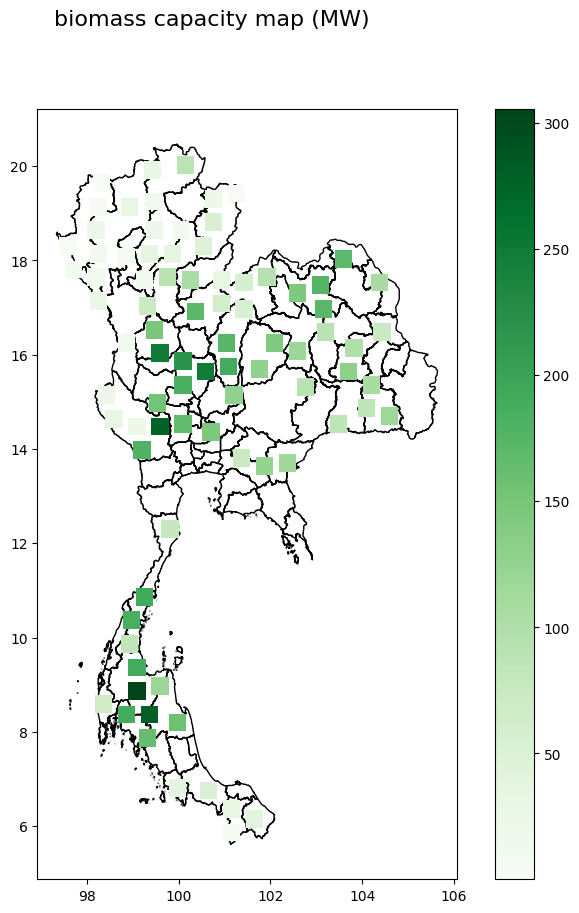

In [14]:
print("total biomass capacity = ", df_biomass['cap_biomass'].sum())
print("R0 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R0'].sum())
print("R1 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R1'].sum())
print("R2 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R2'].sum())
print("R3 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R3'].sum())
print("R4 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('biomass capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_biomass.plot(ax = ax,legend=True,zorder = 1,column = 'cap_biomass',cmap = 'Greens')
except:
    None

total bgec capacity =  294.9439
R0 bgec =  0.0
R1 bgec =  95.9595
R2 bgec =  198.9844
R3 bgec =  0.0
R4 bgec =  0.0


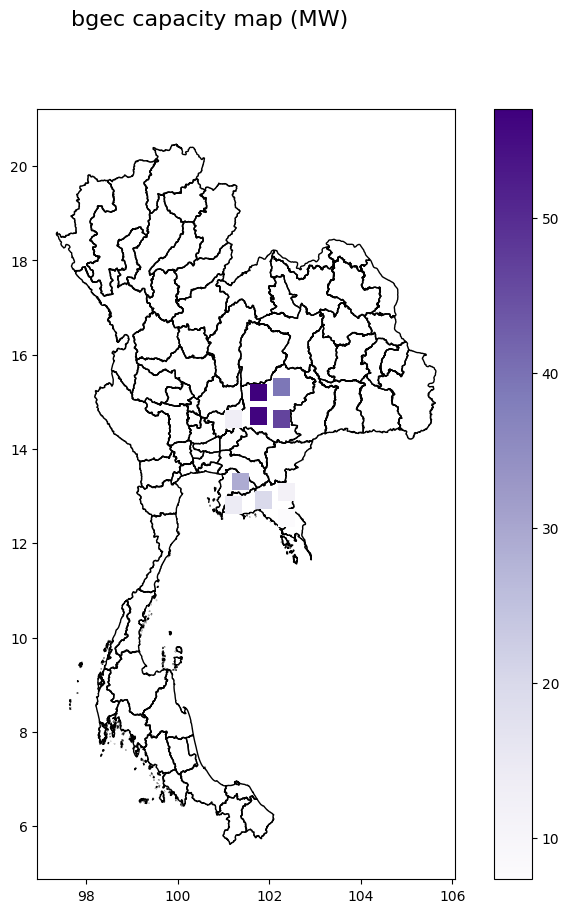

In [15]:
print("total bgec capacity = ", df_bgec['cap_bgec'].sum())
print("R0 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R0'].sum())
print("R1 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R1'].sum())
print("R2 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R2'].sum())
print("R3 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R3'].sum())
print("R4 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('bgec capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_bgec.plot(ax = ax,legend=True,zorder = 1,column = 'cap_bgec',cmap = 'Purples')
except:
    None

total msw capacity =  1624.8753000000002
R0 msw =  679.7262
R1 msw =  470.0055
R2 msw =  250.0498
R3 msw =  105.3033
R4 msw =  119.7905


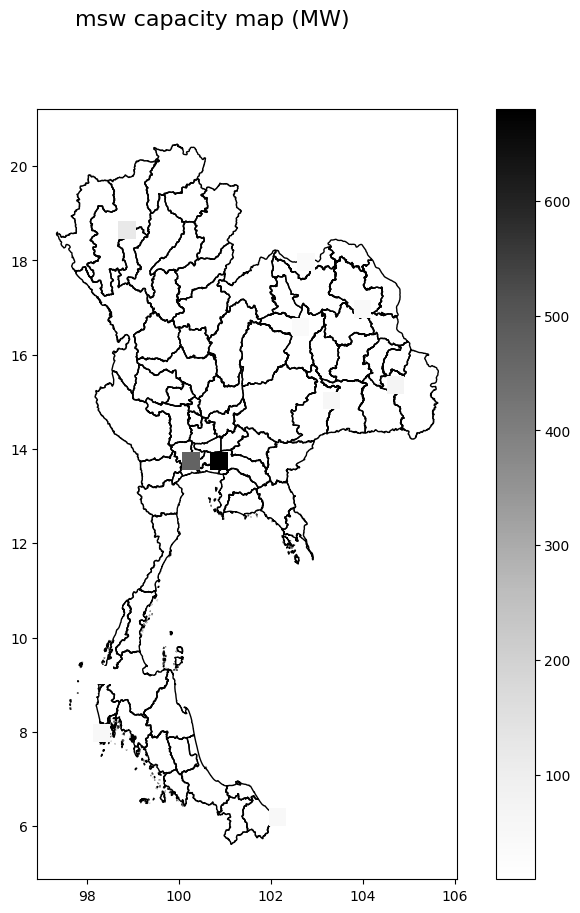

In [16]:
print("total msw capacity = ", df_msw['cap_msw'].sum())
print("R0 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R0'].sum())
print("R1 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R1'].sum())
print("R2 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R2'].sum())
print("R3 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R3'].sum())
print("R4 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('msw capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_msw.plot(ax = ax,legend=True,zorder = 1,column = 'cap_msw',cmap = 'Greys')
except:
    None

In [17]:
region = pd.read_csv('Data\\Region.csv',index_col=False)
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
list_region = []
count = 0
for i in thailandmap['ADM1_TH']:
    r = region['region'].loc[region['province'] == i]
    try : 
        # print(i,r.values[0])
        list_region.append(r.values[0])
    except :
        print(i,'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
        list_region.append('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
thailandmap['region'] = list_region

d:\workstation\REPowerPlant_Siting\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


C:\Users\595078\AppData\Local\Temp\ipykernel_23540\3571846911.py:3: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bound = specificarea.unary_union.bounds


total wind capacity =  1785.6450000000002
total solar capacity =  46511.55130000001
total biomass capacity =  2104.2751
total bgec capacity =  0.0
total msw capacity =  105.3033


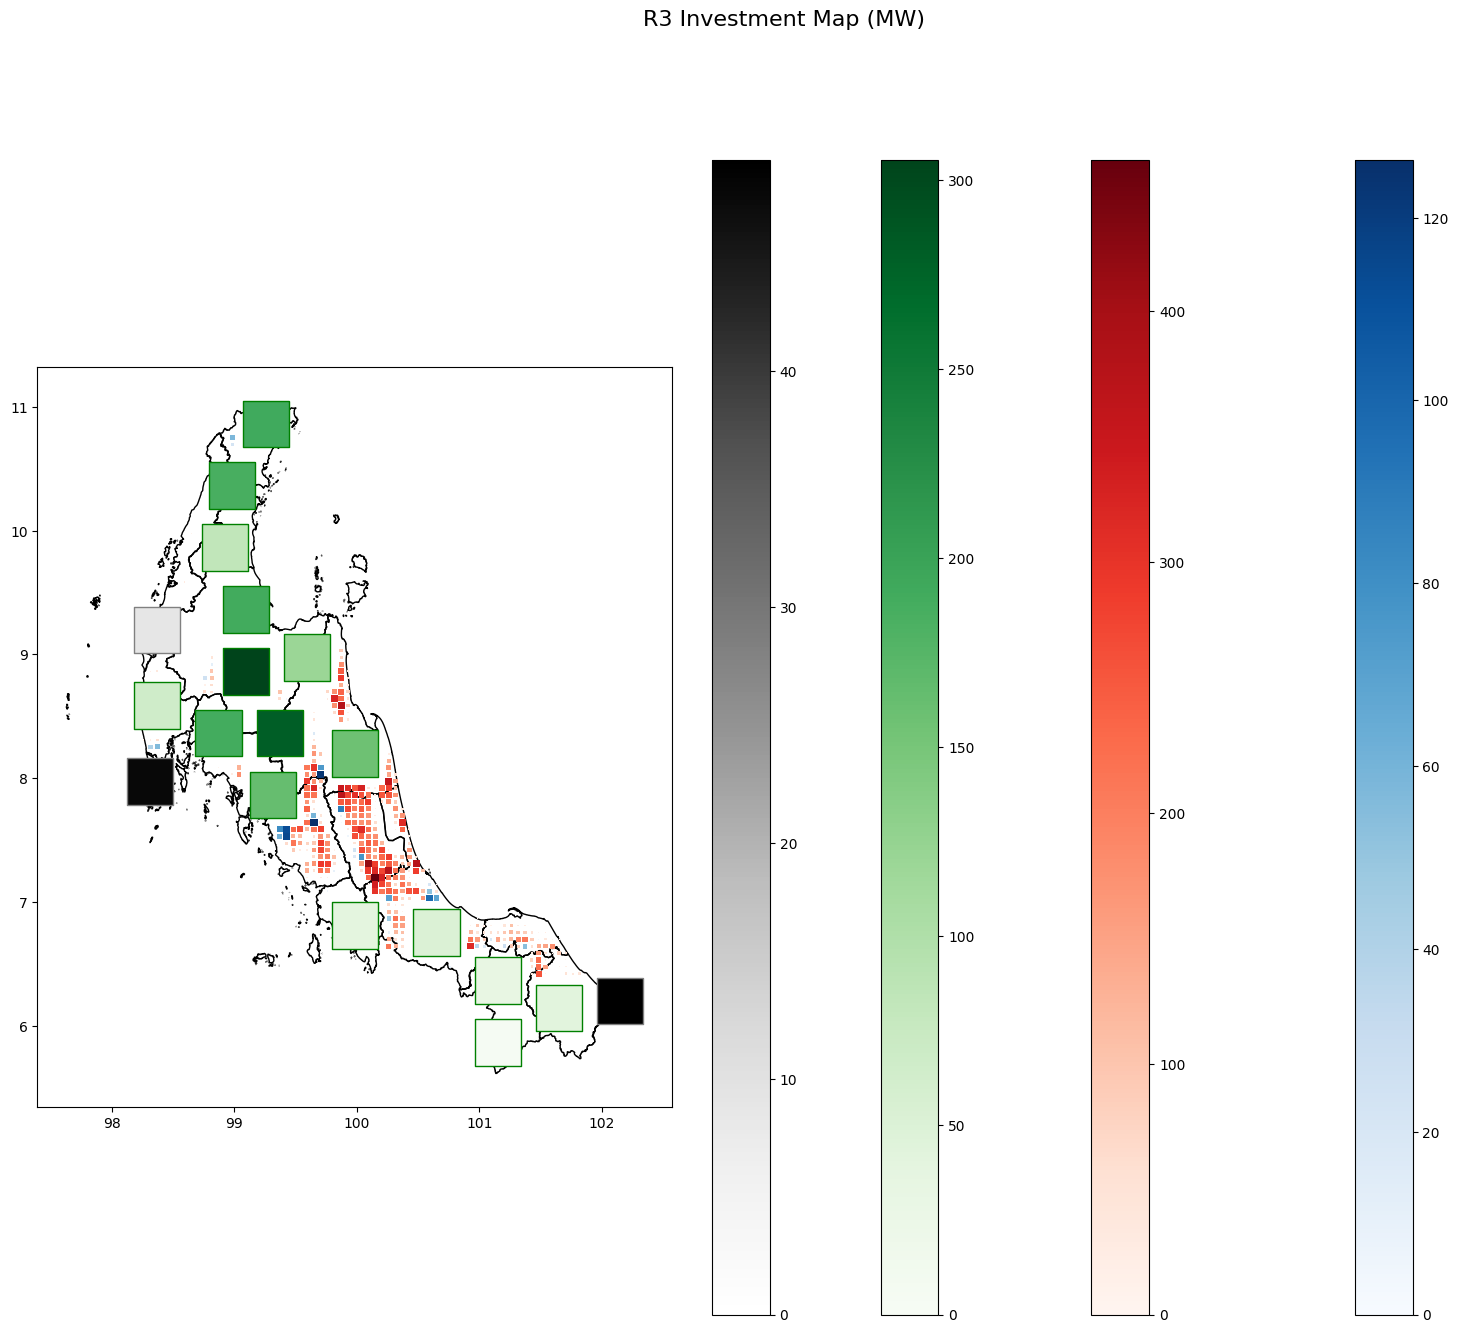

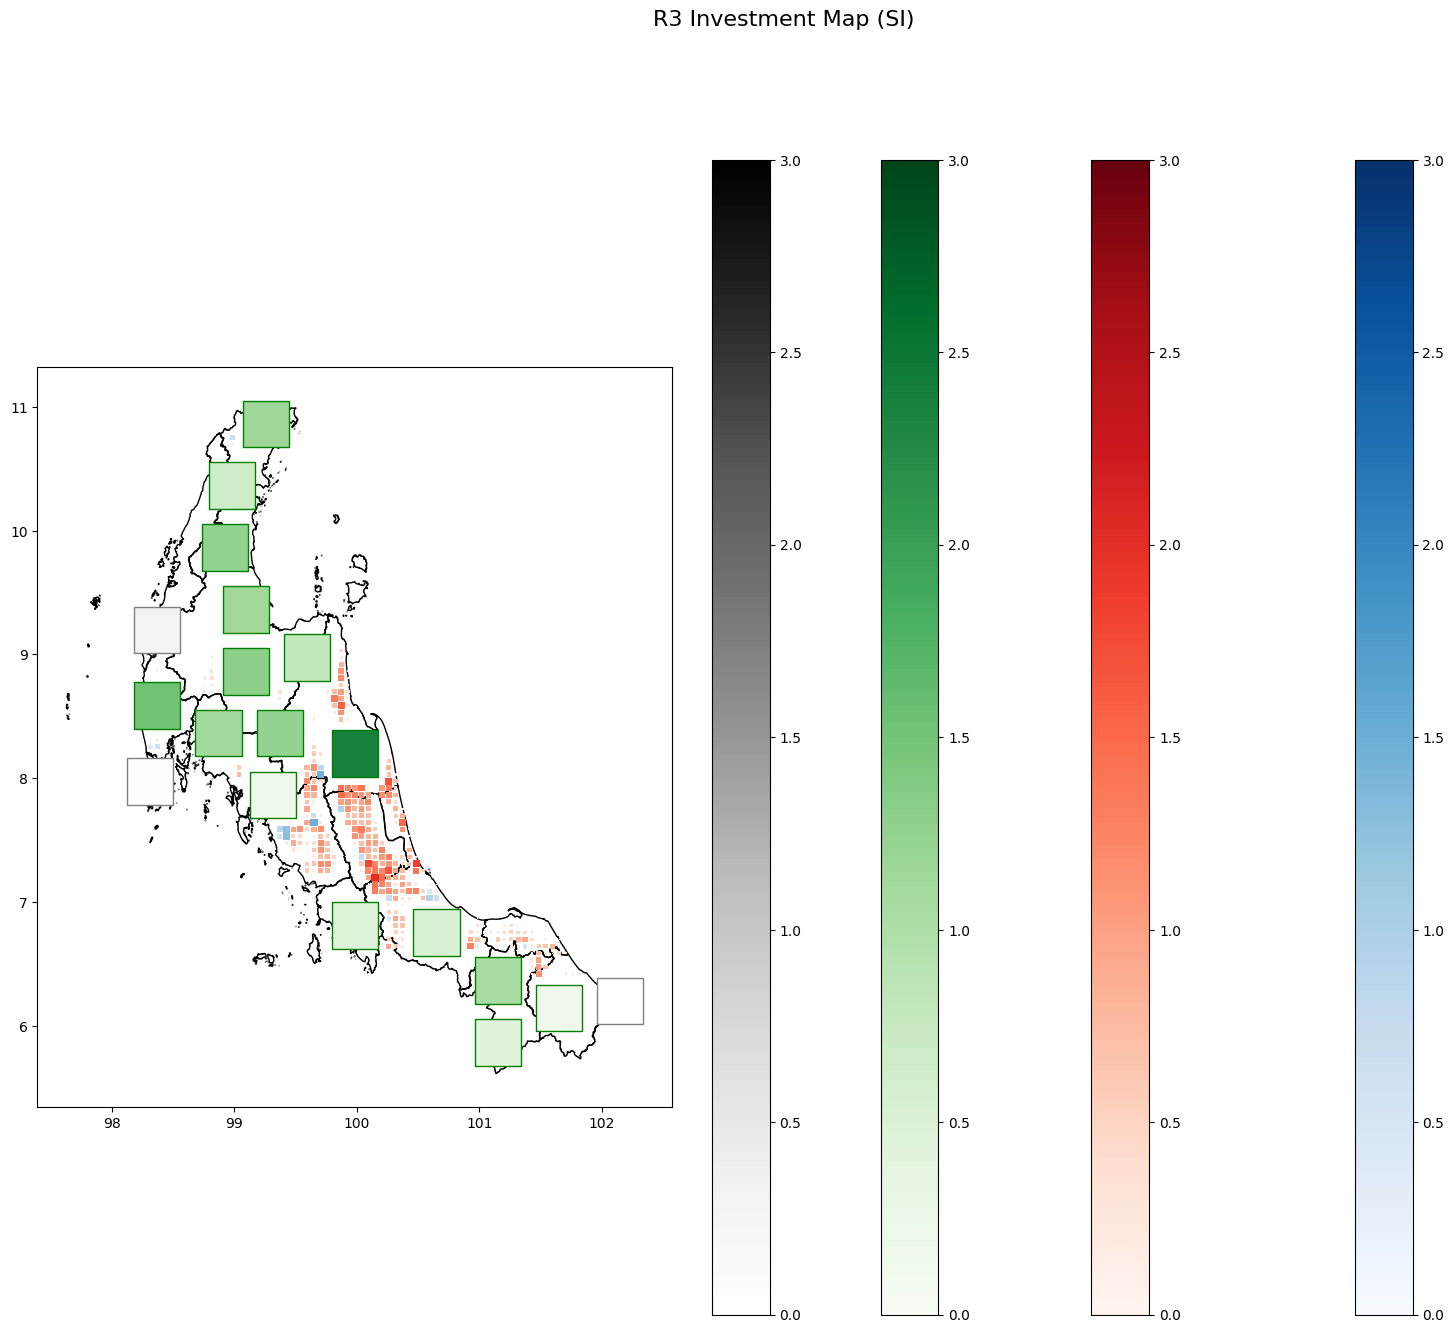

In [18]:
region = 'R3'
specificarea = thailandmap.loc[thailandmap['region'] == region]
bound = specificarea.unary_union.bounds

print("total wind capacity = ", df_wind['cap_wind'].loc[df_wind['region'] == region].sum())

print("total solar capacity = ", df_solar['cap_solar'].loc[df_solar['region'] == region].sum())

print("total biomass capacity = ", df_biomass['cap_biomass'].loc[df_biomass['region'] == region].sum())

print("total bgec capacity = ", df_bgec['cap_bgec'].loc[df_bgec['region'] == region].sum())

print("total msw capacity = ", df_msw['cap_msw'].loc[df_msw['region'] == region].sum())

fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle(region + ' Investment Map (MW) ', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['region'] == region].plot(ax = ax,legend = True,zorder = 1,column = 'cap_wind',cmap = 'Blues',vmin = 0)
except:
    None
try:
    df_solar.loc[df_solar['region'] == region].plot(ax = ax,legend = True,zorder = 2,column = 'cap_solar',cmap = 'Reds',vmin = 0)
except:
    None
try:
    df_biomass.loc[df_biomass['region'] == region].plot(ax = ax,legend = True,zorder = 3,column = 'cap_biomass',cmap = 'Greens',edgecolors = 'green',vmin = 0)
except:
    None
try:
    df_bgec.loc[df_bgec['region'] == region].plot(ax = ax,legend = True,zorder = 4,column = 'cap_bgec',cmap = 'Purples',edgecolors = 'purple',vmin = 0)
except:
    None
try:
    df_msw.loc[df_msw['region'] == region].plot(ax = ax,legend = True,zorder = 5,column = 'cap_msw',cmap = 'Greys',edgecolors = 'grey',vmin = 0)
except:
    None

fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle(region + ' Investment Map (SI) ', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['region'] == region].plot(ax = ax,legend=True,zorder = 1,column = 'SI_Wind',cmap = 'Blues',vmin = 0,vmax=3)
except:
    None
try:
    df_solar.loc[df_solar['region'] == region].plot(ax = ax,legend=True,zorder = 2,column = 'SI_Solar',cmap = 'Reds',vmin = 0,vmax=3)
except:
    None
try:
    df_biomass.loc[df_biomass['region'] == region].plot(ax = ax,legend=True,zorder = 3,column = 'SI_Biomass',cmap = 'Greens',edgecolors = 'green',vmin = 0,vmax=3)
except:
    None
try:
    df_bgec.loc[df_bgec['region'] == region].plot(ax = ax,legend=True,zorder = 4,column = 'SI_BGEC',cmap = 'Purples',edgecolors = 'purple',vmin = 0,vmax=3)
except:
    None
try:
    df_msw.loc[df_msw['region'] == region].plot(ax = ax,legend=True,zorder = 5,column = 'SI_MSW',cmap = 'Greys',edgecolors = 'grey',vmin = 0,vmax=3)
except:
    None